## Image Detection using CNN
Dataset: https://www.cs.toronto.edu/~kriz/cifar.html <br>
About Dataset: The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

#### Using ANN Approach

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 45s 0us/step


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

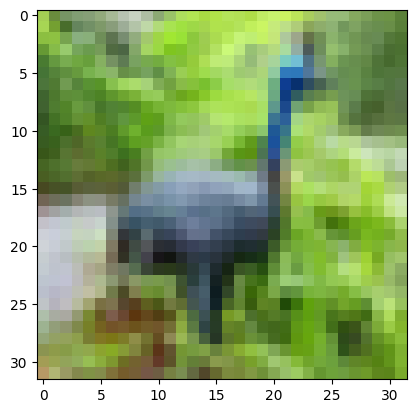

In [6]:
plt.imshow(X_train[6])

In [7]:
y_train = y_train.reshape(-1, )

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [10]:
ann.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
ann.fit(X_train, y_train, epochs=15)

Epoch 1/15


2023-04-07 12:04:39.192846: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 24s 15ms/step - loss: 1.8135 - accuracy: 0.3532
Epoch 2/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.6231 - accuracy: 0.4266
Epoch 3/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5407 - accuracy: 0.4553
Epoch 4/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4799 - accuracy: 0.4763
Epoch 5/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4325 - accuracy: 0.4954
Epoch 6/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3893 - accuracy: 0.5139
Epoch 7/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3491 - accuracy: 0.5252
Epoch 8/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3166 - accuracy: 0.5366
Epoch 9/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2835 - accuracy: 0.5480
Epoch 10/15
1563/1563 [==============================] - 24s 15ms/step - lo

In [12]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.3218 - accuracy: 0.5262


[1.3218142986297607, 0.526199996471405]

In [13]:
from  sklearn.metrics  import  confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: ")
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 6ms/step
Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.39      0.50      1000
           1       0.63      0.70      0.66      1000
           2       0.35      0.60      0.44      1000
           3       0.40      0.33      0.36      1000
           4       0.50      0.38      0.43      1000
           5       0.58      0.28      0.38      1000
           6       0.56      0.62      0.59      1000
           7       0.55      0.64      0.59      1000
           8       0.59      0.75      0.66      1000
           9       0.59      0.58      0.58      1000

    accuracy                           0.53     10000
   macro avg       0.54      0.53      0.52     10000
weighted avg       0.54      0.53      0.52     10000



#### Using CNN Approach

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4599 - accuracy: 0.4780
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1398 - accuracy: 0.5997
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0132 - accuracy: 0.6464
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9332 - accuracy: 0.6771
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8736 - accuracy: 0.6957
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8242 - accuracy: 0.7135
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7744 - accuracy: 0.7303
Epoch 8/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7335 - accuracy: 0.7481
Epoch 9/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6945 - accuracy: 0.7594
Epoch 10/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.661

In [17]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0567 - accuracy: 0.6752


[1.056699514389038, 0.6751999855041504]

In [18]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: ")
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1000
           1       0.84      0.74      0.79      1000
           2       0.58      0.58      0.58      1000
           3       0.47      0.52      0.49      1000
           4       0.61      0.64      0.62      1000
           5       0.61      0.48      0.54      1000
           6       0.76      0.76      0.76      1000
           7       0.71      0.73      0.72      1000
           8       0.84      0.71      0.77      1000
           9       0.69      0.83      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000

